# Heart Failure Prediction

![](https://media.istockphoto.com/id/1293132839/photo/human-heart-with-blocked-arteries.jpg?s=612x612&w=0&k=20&c=8IeDMz8kjt0Qn3L5LIuZo26PbO7cZFg5p-LKGU0ToU0=)

**Problem Statement**

Amidst an abundance of medical data and the growing field of Data Science, numerous startups have taken up the challenge of developing indicators to predict potential diseases. Cardiovascular diseases (CVDs) stand as the leading cause of global mortality, claiming an estimated 17.9 million lives annually, which accounts for 31% of all deaths worldwide. Among CVDs, heart failure is a prevalent occurrence. Timely detection and management are crucial for individuals with cardiovascular disease or those at high risk due to factors such as hypertension, diabetes, hyperlipidemia, or existing conditions. Here, the aid of machine learning models can prove invaluable. By automating disease prediction, we aim to tackle this natural problem and, with the assistance of AI techniques, move on to address the next challenge.

**Methodology**
- Dataset Information
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Modeling
- Conclusion

**Dataset Attributes**
- Age : age of the patient [years]
- Sex : sex of the patient [M: Male, F: Female]
- ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP : resting blood pressure [mm Hg]
- Cholesterol : serum cholesterol [mm/dl]
- FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
- Oldpeak : oldpeak = ST [Numeric value measured in depression]
- ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease : output class [1: heart disease, 0: Normal]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
heartfailure_df= pd.read_csv('heart  failure data.csv')

In [5]:
heartfailure_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [54]:
heartfailure_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
heartfailure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The data seems clean so we dont have to process it and remove errors.

In [12]:
heartfailure_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


- The values are reasonable there seems no unusual trend or any out lier. The data set contain people from age 28 to 77 because perople below that age are not prone to heartattack so considering that data can bias our predictions.

## Exploratry Data Analysis

In [77]:
numerical_cols=list(heartfailure_df.describe().columns)
categorical_cols=['Sex','ChestPainType','ExerciseAngina','RestingECG']

In [78]:
heartfailure_df[categorical_cols]

,Sex,ChestPainType,ExerciseAngina,RestingECG
0,M,ATA,N,Normal
1,F,NAP,N,Normal
2,M,ATA,N,ST
3,F,ASY,Y,Normal
4,M,NAP,N,Normal
...,...,...,...,...
913,M,TA,N,Normal
914,M,ASY,N,Normal
915,M,ASY,Y,Normal
916,F,ATA,N,LVH


In [79]:
heartfailure_df[numerical_cols].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


<Axes: >

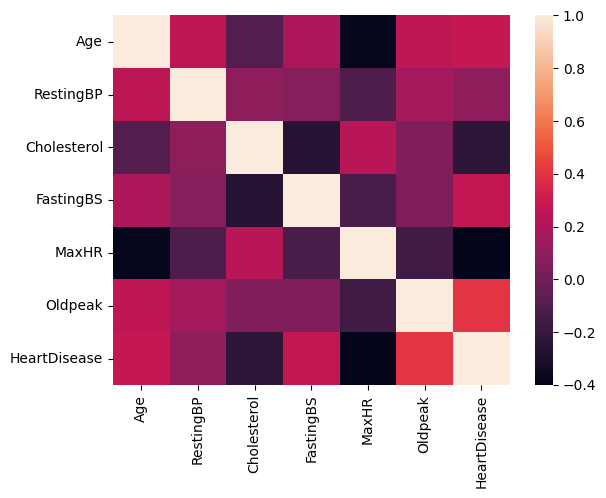

In [16]:
sns.heatmap(heartfailure_df[numerical_cols].corr())

- MaxHR has the strongest correlation with heartdisease. Ase seems to have a lesser relation so young individuals are alse prone to heartattacks. Colestrol has the secound highest coorelation so overall health plays important 

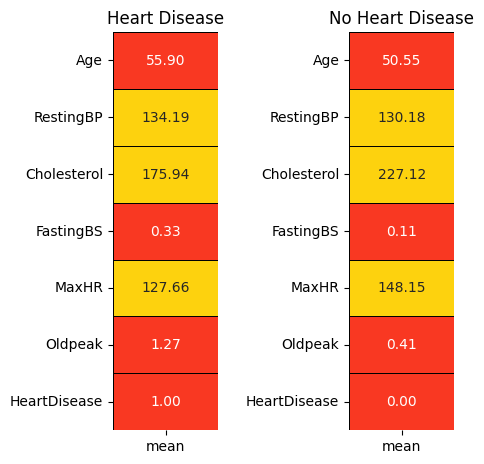

In [17]:
 yes = heartfailure_df[heartfailure_df['HeartDisease'] == 1].describe().T
no = heartfailure_df[heartfailure_df['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

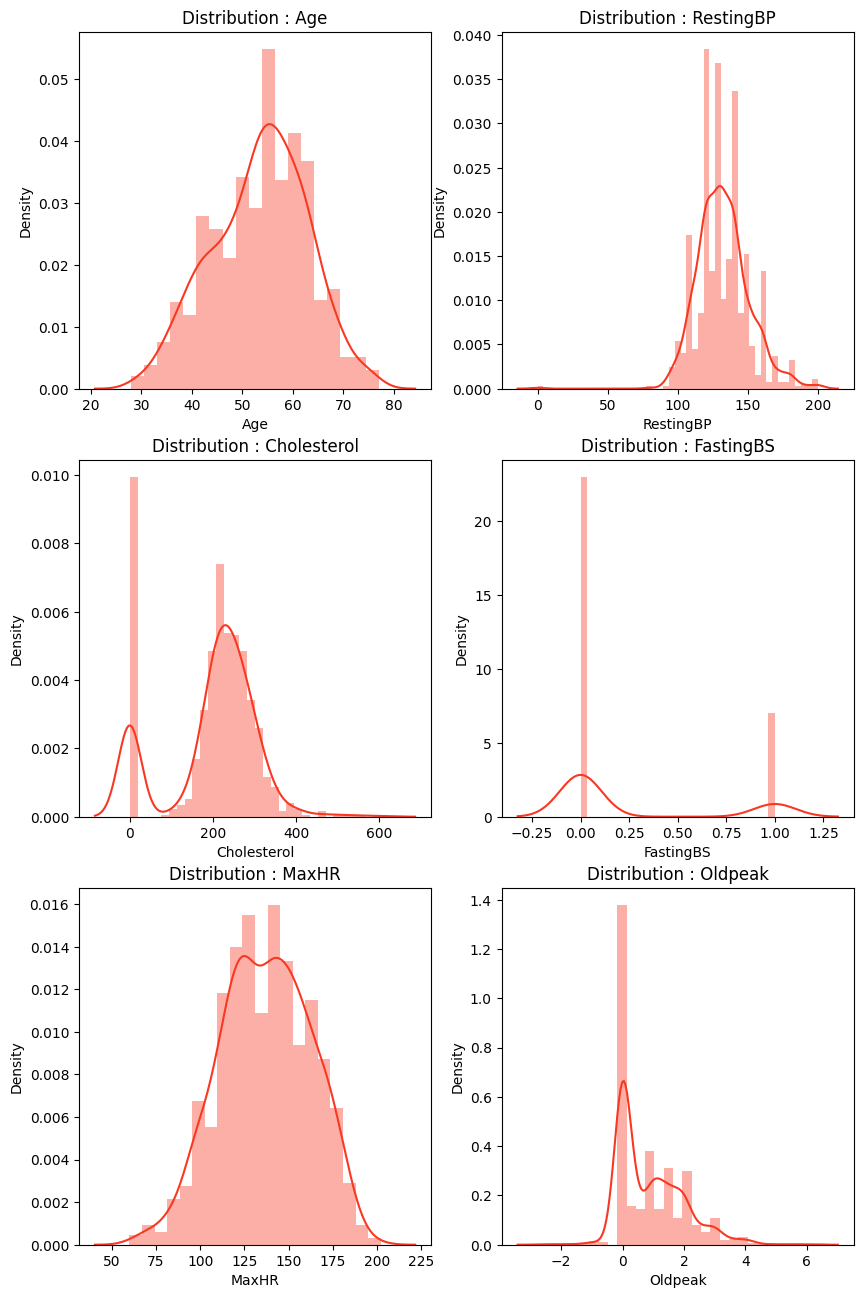

In [37]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (10,15.75))
for i in range(len(numerical_cols) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(heartfailure_df[numerical_cols[i]],color = colors[0])
    title = 'Distribution : ' + numerical_cols[i]
    plt.title(title)
plt.show()



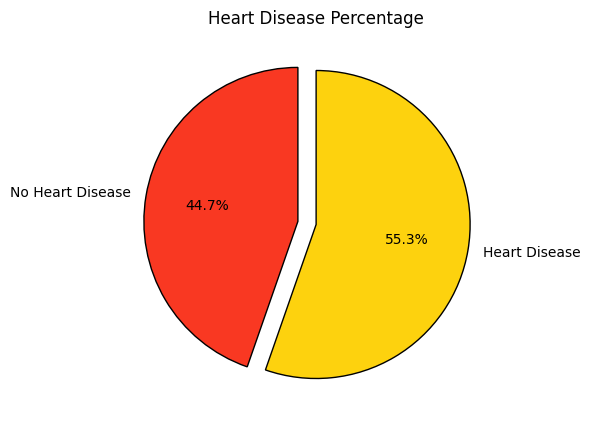

In [49]:
l = list(heartfailure_df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,1,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.12,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease Percentage');


- Data is evenly divided so we need not add weight to any one factor.

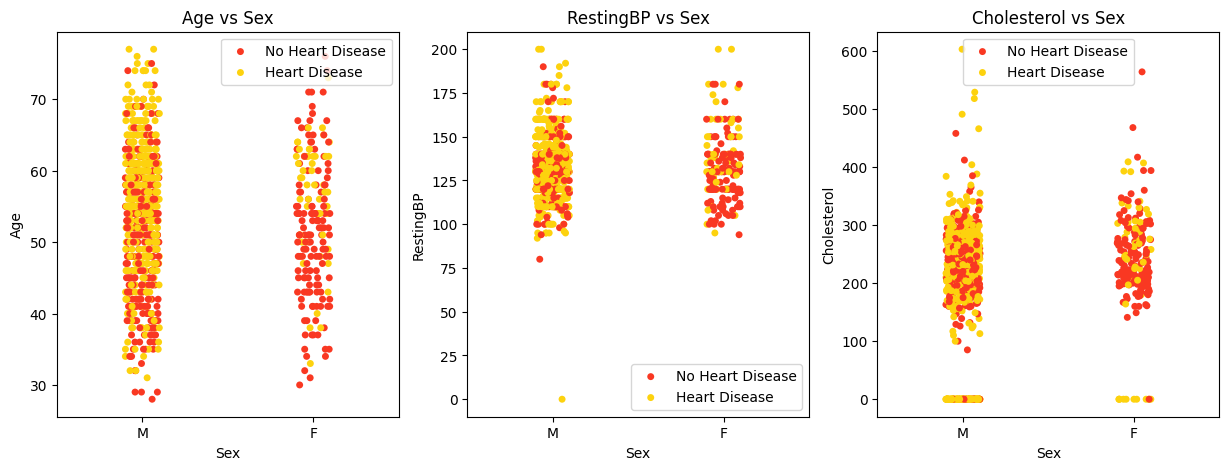

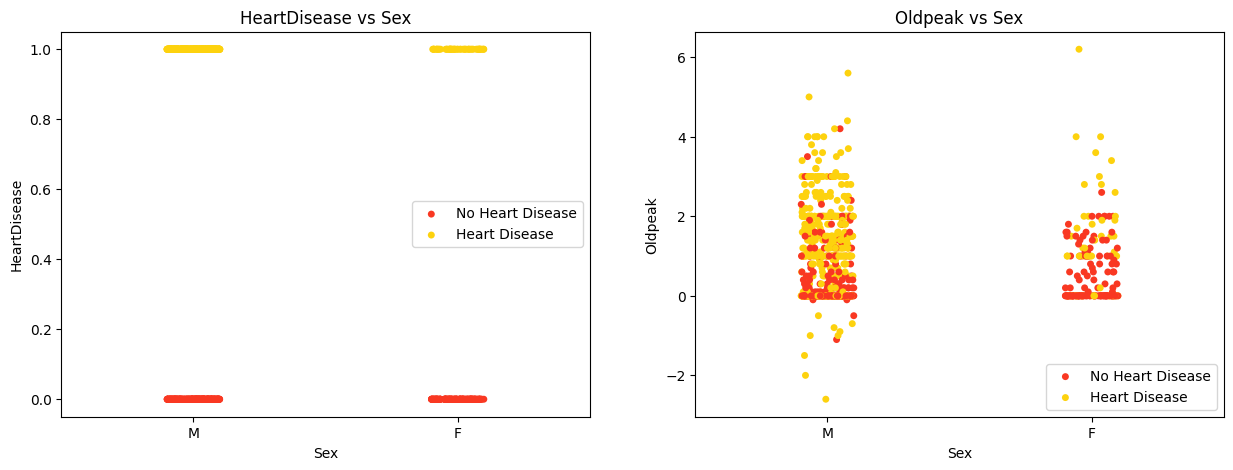

In [100]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_cols[i],data = heartfailure_df,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_cols[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_cols[i],data = heartfailure_df,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_cols[i] + ' vs Sex' 
    plt.title(title);

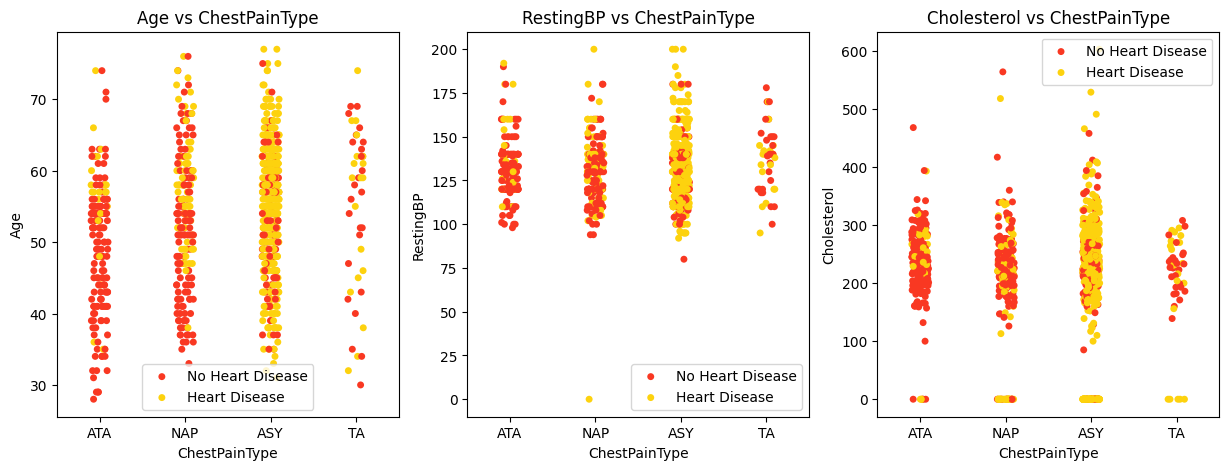

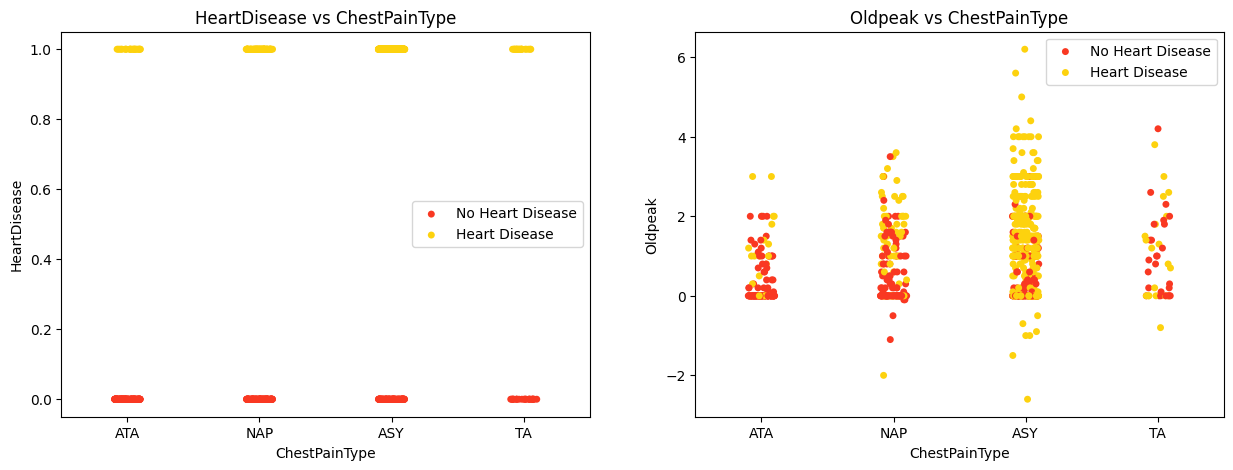

In [102]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_cols[i],data = heartfailure_df,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_cols[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_cols[i],data = heartfailure_df,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_cols[i] + ' vs ChestPainType' 
    plt.title(title);

In [132]:
!pip install scikit-learn --upgrade --quiet


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
train_df, test_df = train_test_split(heartfailure_df, test_size=0.2, random_state=42)


### Input and Target Columns

Let's identify the input and target columns.

In [120]:
heartfailure_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [123]:
input_cols = list(heartfailure_df.columns)[0:-1]
target_col = 'HeartDisease'

In [124]:
input_cols

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [135]:
train_inputs =train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [136]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [130]:
heartfailure_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- The data is clean so we dont need to simpleimputer

In [137]:
test_inputs

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,F,ATA,140,195,0,Normal,179,N,0.00,Up
30,53,M,NAP,145,518,0,Normal,130,N,0.00,Flat
377,65,M,ASY,160,0,1,ST,122,N,1.20,Flat
535,56,M,ASY,130,0,0,LVH,122,Y,1.00,Flat
807,54,M,ATA,108,309,0,Normal,156,N,0.00,Up
...,...,...,...,...,...,...,...,...,...,...,...
211,50,F,NAP,140,288,0,Normal,140,Y,0.00,Flat
745,63,F,ASY,108,269,0,Normal,169,Y,1.80,Flat
584,64,M,ASY,141,244,1,ST,116,Y,1.50,Flat
878,49,M,ATA,130,266,0,Normal,171,N,0.60,Up


In [153]:
numerical_cols


['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
scaler = MinMaxScaler()

In [156]:
scaler.fit(heartfailure_df[numeric_cols])

MinMaxScaler()

In [157]:
numeric_cols=numerical_cols[:-1]
numeric_cols

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [158]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [159]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [163]:
encoder.fit(heartfailure_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [164]:
encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['LVH', 'Normal', 'ST'], dtype=object)]

In [165]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST']


In [166]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [167]:
pd.set_option('display.max_columns', None)

In [168]:
test_inputs

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
668,0.71,F,ATA,0.70,0.32,0.00,Normal,0.84,N,0.30,Up,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
30,0.51,M,NAP,0.72,0.86,0.00,Normal,0.49,N,0.30,Flat,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
377,0.76,M,ASY,0.80,0.00,1.00,ST,0.44,N,0.43,Flat,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
535,0.57,M,ASY,0.65,0.00,0.00,LVH,0.44,Y,0.41,Flat,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
807,0.53,M,ATA,0.54,0.51,0.00,Normal,0.68,N,0.30,Up,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.45,F,NAP,0.70,0.48,0.00,Normal,0.56,Y,0.30,Flat,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
745,0.71,F,ASY,0.54,0.45,0.00,Normal,0.77,Y,0.50,Flat,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
584,0.73,M,ASY,0.70,0.40,1.00,ST,0.39,Y,0.47,Flat,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
878,0.43,M,ATA,0.65,0.44,0.00,Normal,0.78,N,0.36,Up,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [169]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (734, 22)
train_targets: (734,)
test_inputs: (184, 22)
test_targets: (184,)


## Training Different Models

- **Logistic regression**

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
model = LogisticRegression(solver='liblinear')

In [172]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [173]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [174]:
print(model.coef_.tolist())

[[0.7813768149564424, 0.071267200742773, -1.8224001844347222, 1.0064996185203572, -1.6284029338398558, 2.993682335805926, -0.6106233276114448, 0.40591145894950953, 0.8751821392706638, -0.8559399608403114, -0.33992101090842175, 0.11596696381609582, -0.8952859084400219, 0.6905740397780492, 0.183916891424185, -0.08908752769992555, -0.2995412323862386]]


In [175]:
print(model.intercept_)

[-0.20471187]


In [177]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [178]:
train_preds = model.predict(X_train)

In [179]:
train_preds

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [180]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.72230613, 0.27769387],
       [0.8858998 , 0.1141002 ],
       [0.04653587, 0.95346413],
       ...,
       [0.13384974, 0.86615026],
       [0.09524262, 0.90475738],
       [0.75068785, 0.24931215]])

In [181]:
model.classes_

array([0, 1], dtype=int64)

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(train_targets, train_preds)

0.8310626702997275

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.80780781, 0.19219219],
       [0.14962594, 0.85037406]])

In [187]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 83.11%


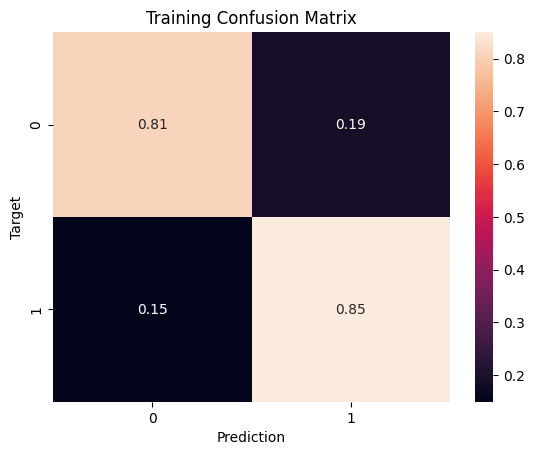

In [188]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 81.52%


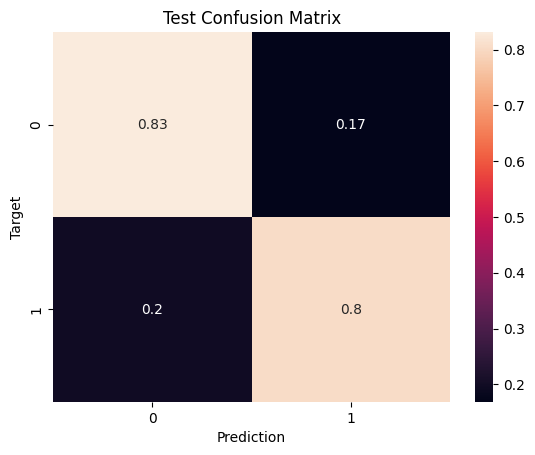

In [189]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [191]:
from sklearn.tree import DecisionTreeClassifier

- **Decision tree classifier**

In [192]:
model = DecisionTreeClassifier(random_state=42)

In [193]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 0 ns
Wall time: 98.6 ms


DecisionTreeClassifier(random_state=42)

In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [195]:
train_preds = model.predict(X_train)

In [196]:
train_preds

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [199]:
test_preds = model.predict(X_test)

In [200]:
accuracy_score(train_targets, train_preds)

1.0

In [204]:
accuracy_score(test_targets, test_preds)

0.6956521739130435

The accuracy on the training data is about 100 percent but on test data it drastically decreases because of the overfitting we can overtune its hyperparameters to avoid over fitting.

In [205]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [207]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [208]:
model.score(X_train, train_targets)

0.837874659400545

In [210]:
model.score(X_test, test_targets)

0.7282608695652174

In [211]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_test, test_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [212]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 188 ms
Wall time: 202 ms


In [213]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.25,0.34
1,2,0.19,0.25
2,3,0.16,0.27
3,4,0.15,0.26
4,5,0.14,0.26
5,6,0.11,0.28
6,7,0.10,0.28
7,8,0.07,0.29
8,9,0.04,0.30
9,10,0.02,0.33


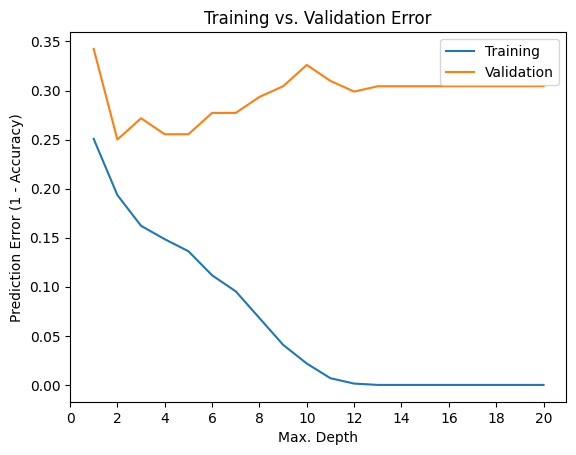

In [214]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

3 is the most efficent so this model can ony give 72.8 accuracy which is much less then logistic regressor model.

- **Random Forest Classifier**

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [217]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 156 ms
Wall time: 431 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [218]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 31.2 ms
Wall time: 215 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [219]:
model.score(X_train, train_targets)

1.0

In [221]:
model.score(X_test, test_targets)

0.782608695652174

Random model forest have better accuracy than decision tree model but still it have poor accuracy than logistic regression.

In [222]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [223]:
base_train_acc = base_model.score(X_train, train_targets)
base_test_acc = base_model.score(X_test, test_targets)

In [225]:
base_accs = base_train_acc, base_test_acc
base_accs

(1.0, 0.782608695652174)

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [226]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [227]:
model.score(X_train, train_targets), model.score(X_test, test_targets)

(1.0, 0.782608695652174)

In [228]:
base_accs

(1.0, 0.782608695652174)

### All Hyperparameters Together

Let's train a random forest with customized hyperparameters based on our learnings of different hyperpraams

In [233]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, )

In [234]:
model.fit(X_train, train_targets)

RandomForestClassifier(max_depth=30, max_features=7, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [236]:
model.score(X_train, train_targets), model.score(X_test, test_targets)

(1.0, 0.7880434782608695)

## Conclusion
Based on the three models you trained and their respective accuracies, here are the conclusions:

1. Logistic Regression (Accuracy: 81.52%):
The logistic regression model achieved the highest accuracy among the three models, reaching 81.52%. This indicates that the model performed well in distinguishing between patients prone to heart failure and those who are not. It is a linear model that may have captured important relationships between the input features and the target variable. However, it's essential to analyze other evaluation metrics like precision, recall, and F1-score to get a comprehensive understanding of its performance.

2. Decision Tree (Accuracy: 72.82%):
The decision tree model obtained an accuracy of 72.82%, which is lower than the logistic regression model. Decision trees are non-linear models that can capture complex relationships in the data. While the accuracy is decent, it is essential to investigate whether the model is overfitting or underfitting and consider tuning hyperparameters to improve performance.

3. Random Forest Classifier (Accuracy: 78.80%):
The random forest classifier achieved an accuracy of 78.80%. Random forests are an ensemble of decision trees that combine predictions from multiple trees to make more robust and accurate predictions. The accuracy suggests that the random forest model performed well, but, similar to the decision tree, hyperparameter tuning and further evaluation are necessary to optimize its performance.

Overall, the logistic regression model showed the highest accuracy, making it a promising candidate for predicting heart failure. However, it's crucial to delve deeper into model evaluation metrics, conduct cross-validation, and consider other factors such as interpretability, computational complexity, and sensitivity to class imbalances before deciding on the final model. Additionally, further analysis and feature engineering might improve the performance of all three models and provide better insights into predicting heart failure.